# Demo target data model

This notebook demonstrates the target data model used in the `diffprof` repo. The purpose of the target data model is to approximate the scaling relations between halo concentration, time, mass, and $p_{50\%}$ seen in the simulations. These approximate scaling relations are what we will use to optimize the parameters of DiffprofPop.

All functions and modules related to the target data model are located inside the `target_data_model` subdirectory. There are three independent modules:
1. **diffconc_target_data_model.py** implements the `approximate_lgconc_vs_lgm_p50` function that smoothly approximates $\langle \log_{10}c(t)\ \vert\ M_{\rm halo}, p_{50\%}\rangle$
2. **diffconc_std_lgconc_target_data_model.py** implements the `approx_std_lgconc_vs_lgm` function that smoothly approximates $\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo}\right)$
3. **diffconc_std_p50_model.py** implements the `_scatter_vs_p50_and_lgmhalo` function that smoothly approximates $\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo},\ p_{50\%}\right)$

Each of these modules has a `PARAMS` dictionary storing the parameters of the target data models. These parameters have already been calibrated to give accurate approximations to our simulations.

In [1]:
import matplotlib.cm as cm
from time import time
from matplotlib import lines as mlines
import numpy as np

In [2]:
from diffprof import target_data_model as tdm

### Use the target data model to plot $\langle \log_{10}c(t)\ \vert\ M_{\rm halo}, p_{50\%}\rangle$

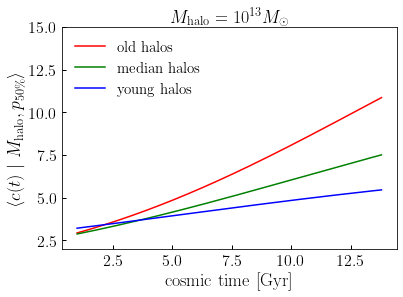

In [3]:
tarr = np.linspace(1, 13.8, 200)
lgm = 13.
mean_lgc_old = tdm.approximate_lgconc_vs_lgm_p50(tarr, lgm, 0.1, *tdm.target_data_model_params_mean_lgconc.values())
mean_lgc_mid = tdm.approximate_lgconc_vs_lgm_p50(tarr, lgm, 0.5, *tdm.target_data_model_params_mean_lgconc.values())
mean_lgc_young = tdm.approximate_lgconc_vs_lgm_p50(tarr, lgm, 0.9, *tdm.target_data_model_params_mean_lgconc.values())

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(2, 15)
__=ax.plot(tarr, 10**mean_lgc_old, color='red', label=r'${\rm old\ halos}$')
__=ax.plot(tarr, 10**mean_lgc_mid, color='green', label=r'${\rm median\ halos}$')
__=ax.plot(tarr, 10**mean_lgc_young, color='blue', label=r'${\rm young\ halos}$')
leg = ax.legend()
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\langle c(t)\ \vert\ M_{\rm halo}, p_{50\%}\rangle$')
title = ax.set_title(r'$M_{\rm halo}=10^{13}M_{\odot}$')

### Use the target data model to plot $\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo}\right)$

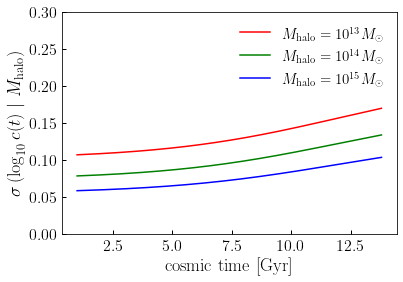

In [4]:
std_lgc_lgm13 = tdm.approx_std_lgconc_vs_lgm(tarr, 13, *tdm.target_data_model_params_std_lgconc.values())
std_lgc_lgm14 = tdm.approx_std_lgconc_vs_lgm(tarr, 14, *tdm.target_data_model_params_std_lgconc.values())
std_lgc_lgm15 = tdm.approx_std_lgconc_vs_lgm(tarr, 15, *tdm.target_data_model_params_std_lgconc.values())

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0, 0.3)
__=ax.plot(tarr, std_lgc_lgm13, color='red', label=r'$M_{\rm halo}=10^{13}M_{\odot}$')
__=ax.plot(tarr, std_lgc_lgm14, color='green', label=r'$M_{\rm halo}=10^{14}M_{\odot}$')
__=ax.plot(tarr, std_lgc_lgm15, color='blue', label=r'$M_{\rm halo}=10^{15}M_{\odot}$')
leg = ax.legend()
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo}\right)$')


### Use the target data model to plot $\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo},\ p_{50\%}\right)$

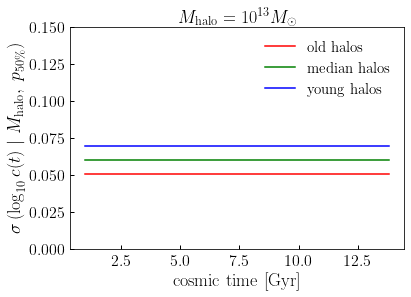

In [5]:
lgm = 13
std_lgc_old = tdm._scatter_vs_p50_and_lgmhalo(lgm, 0.1, *tdm.target_data_model_params_std_lgconc_p50.values())
std_lgc_mid = tdm._scatter_vs_p50_and_lgmhalo(lgm, 0.5, *tdm.target_data_model_params_std_lgconc_p50.values())
std_lgc_young = tdm._scatter_vs_p50_and_lgmhalo(lgm, 0.9, *tdm.target_data_model_params_std_lgconc_p50.values())

zz = np.zeros_like(tarr)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0, 0.15)
__=ax.plot(tarr, zz+std_lgc_old, color='red', label=r'${\rm old\ halos}$')
__=ax.plot(tarr, zz+std_lgc_mid, color='green', label=r'${\rm median\ halos}$')
__=ax.plot(tarr, zz+std_lgc_young, color='blue', label=r'${\rm young\ halos}$')
leg = ax.legend()
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\sigma\left( \log_{10}c(t)\ \vert\ M_{\rm halo},\ p_{50\%}\right)$')
title = ax.set_title(r'$M_{\rm halo}=10^{13}M_{\odot}$')